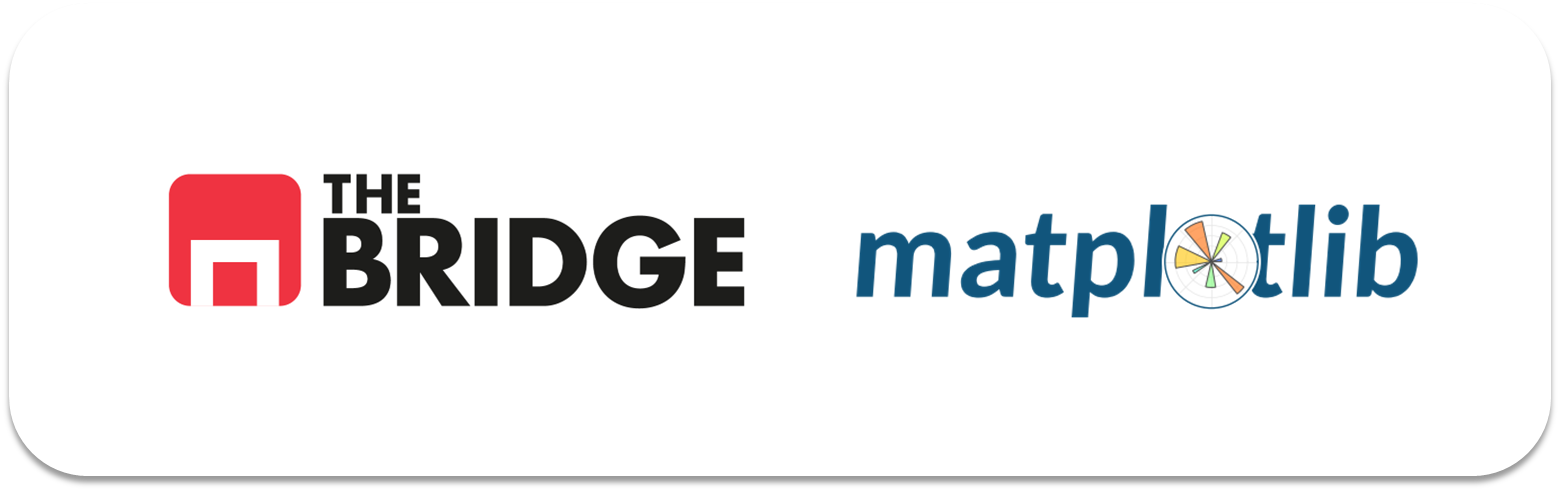

## PRACTICA OBLIGATORIA: VISUALIZACION BASICA

* La práctica obligatoria de esta unidad consiste en un único ejercicio de construcción de gráficas. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Aseguramos que las gráficas se muestren en el notebook (si estás usando uno)
%matplotlib inline

## #1

### #1.1

Carga el dataset de casas de California que está en la ruta "./data/california_cities.csv". Muestra parte de su contenido y su descripción. Deshazte de las filas con nulos.

In [2]:
df = pd.read_csv('./data/california_cities.csv')

In [3]:
# Pequeña muestra de los datos
df.sample(3)

,Unnamed: 0,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
241,241,LosGatos,37.236111,-121.961667,105.0,344.0,29413,11.160,11.080,0.080,28.903,28.697,0.206,0.71
310,310,Parlier,36.611667,-119.526944,105.0,344.0,14494,2.194,2.194,0.000,5.682,5.682,0.000,0.00
207,207,LaHabra,33.931944,-117.946111,91.0,299.0,60239,7.376,7.370,0.006,19.104,19.088,0.016,0.08


In [4]:
# Descripción de los datos
df.describe()

,Unnamed: 0,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
count,482.000000,482.000000,482.000000,434.000000,470.000000,4.820000e+02,480.000000,482.000000,481.000000,477.000000,478.000000,478.000000,477.000000
mean,240.500000,36.095088,-119.837714,180.416705,567.168723,6.489493e+04,18.442183,16.840981,1.589630,46.753283,43.547021,3.125178,5.301801
std,139.285678,2.298006,2.147676,309.531825,1001.265722,2.032041e+05,36.363230,32.694647,9.490386,90.972269,84.933022,11.562269,14.656428
min,0.000000,32.578333,-124.263333,-34.000000,-180.000000,1.000000e+00,0.314000,0.314000,0.000000,0.813000,0.813000,0.000000,0.000000
25%,120.250000,33.977292,-121.954931,22.000000,69.000000,1.090200e+04,3.708250,3.506500,0.000000,9.551000,9.025000,0.000250,0.000000
50%,240.500000,36.204722,-119.708611,67.000000,200.000000,2.905750e+04,9.093000,8.362000,0.029000,23.551000,21.533000,0.078500,0.340000
75%,360.750000,37.886667,-117.977292,173.500000,515.000000,6.646650e+04,19.878250,19.090000,0.244000,51.772000,49.322000,0.623250,1.870000
max,481.000000,41.965000,-114.596389,2402.000000,7880.000000,3.884307e+06,503.000000,469.000000,185.020000,1302.000000,1214.000000,122.270000,84.580000


In [5]:
# Borramos filas con nulos
df = df.dropna()

### #1.2

Recrea la siguiente figura, para ello construye en apartados separados cada gráfico y luego haz un apartado en el que se junten los cuatro. Las figuras son:
1. Las ciudades más pobladas, con los numeros de las poblaciones (tendrás que usar texto y recordar que para centrarlos se necesita poner el argumento `ha` a "center"). (Colores: azul, gris, aceituna, marrón, con trasparencia)
2. Histograma del área total ocupada por las ciudades. (50 bins, fuente = "Bradley Hand itc", tamaño 18, color azul acero)
3. El scatter de área de agua de un ciudad con su poblacion.
4. El boxplot de la altura de las ciudades.

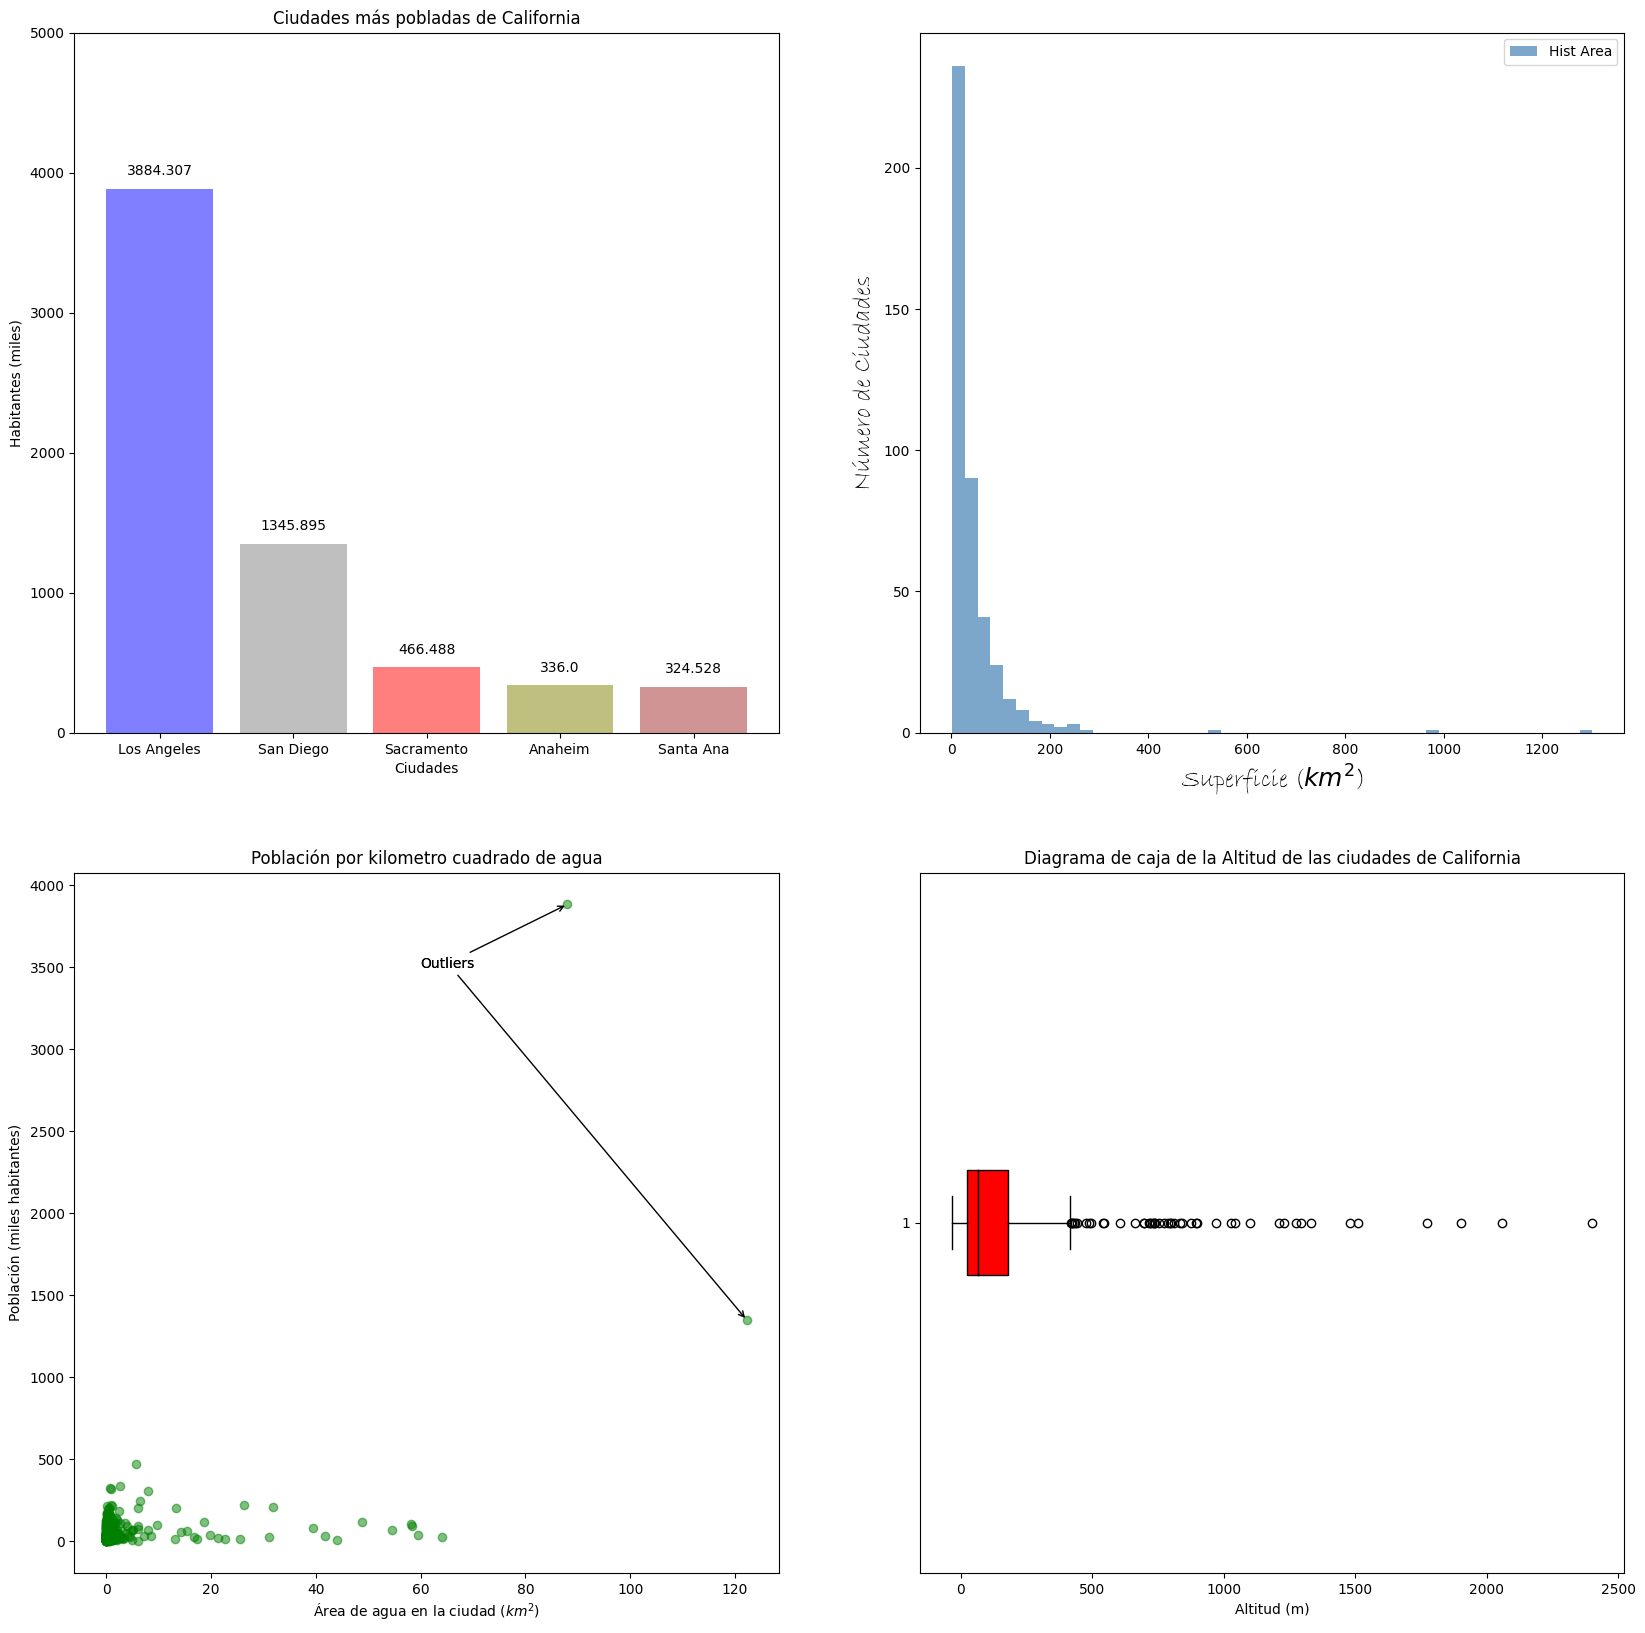

C:\Users\aperez\AppData\Local\Temp\ipykernel_7200\4011182820.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_cities['formatted_city'] = top_cities['city'].str.replace(r'([a-z])([A-Z])', r'\1 \2', regex=True)


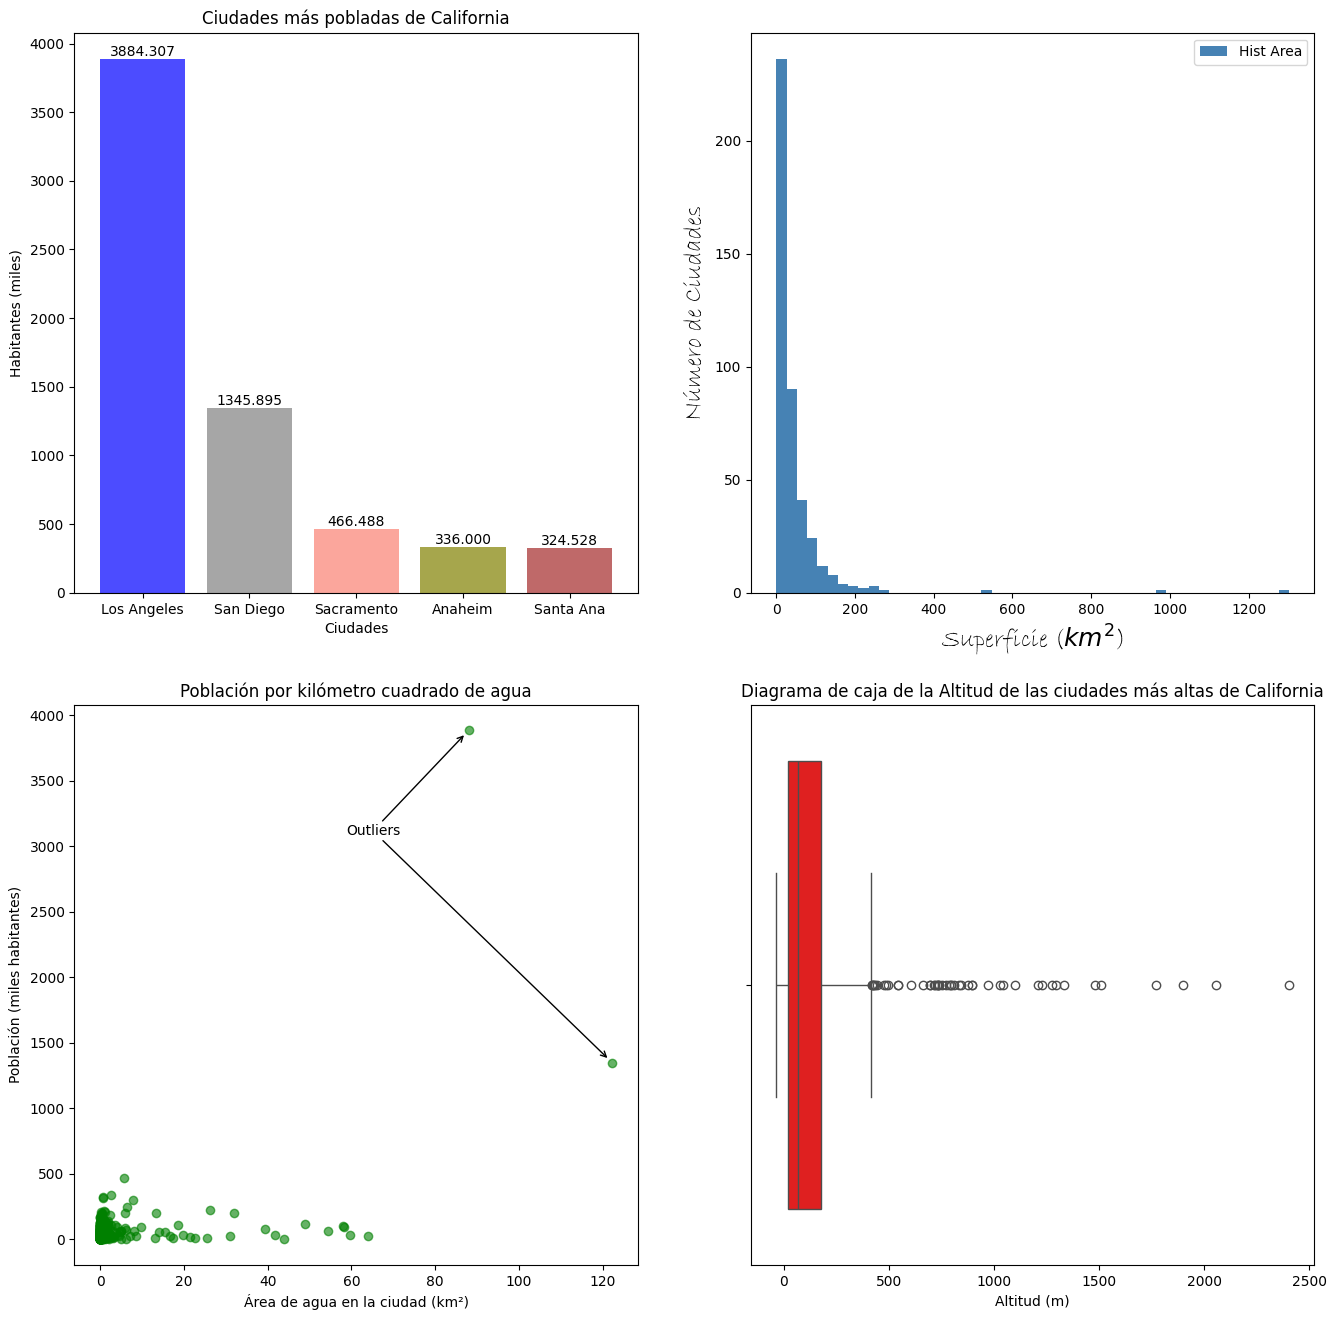

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

def create_figure():
    # Crear figura y subgráficos
    fig, axes = plt.subplots(2, 2, figsize=(16, 16))  # 2 filas, 2 columnas

    # 1. Gráfico de barras de las ciudades más pobladas
    df_sorted = df.sort_values('population_total', ascending=False)
    top_cities = df_sorted.head(5)
    colors = ['blue', 'gray', 'salmon', 'olive', 'brown']

    top_cities['formatted_city'] = top_cities['city'].str.replace(r'([a-z])([A-Z])', r'\1 \2', regex=True)

    axes[0, 0].bar(top_cities['formatted_city'], top_cities['population_total'] / 1000, color=colors, alpha=0.7)
    axes[0, 0].set_ylabel('Habitantes (miles)')
    axes[0, 0].set_xlabel('Ciudades')
    axes[0, 0].set_title('Ciudades más pobladas de California')

    # Etiquetas en las barras
    for bar, pop in zip(axes[0, 0].containers[0], top_cities['population_total']):
        height = bar.get_height()
        axes[0, 0].text(bar.get_x() + bar.get_width() / 2, height, f'{pop / 1000:.3f}', ha='center', va='bottom')

    # 2. Histograma del área total ocupada por las ciudades
    font = {'fontname': 'Bradley Hand ITC', 'fontsize': 18}  # Estilo de fuente
    axes[0, 1].hist(df['area_total_km2'], bins=50, color='steelblue', label='Hist Area')
    axes[0, 1].set_xlabel('Superficie ', fontdict=font)
    axes[0, 1].xaxis.get_label().set_text('Superficie (' + r'$km^2$' + ')')
    axes[0, 1].set_ylabel('Número de Ciudades', fontdict=font)
    axes[0, 1].legend(loc='upper right')

    # 3. Scatter plot del área de agua con la población
    axes[1, 0].scatter(df['area_water_km2'], df['population_total'] / 1000, color='green', alpha=0.6)
    axes[1, 0].set_xlabel('Área de agua en la ciudad (km²)')
    axes[1, 0].set_ylabel('Población (miles habitantes)')
    axes[1, 0].set_title('Población por kilómetro cuadrado de agua')

    # Outliers en el scatter plot
    outlier_threshold = 1000  # En miles de habitantes
    outliers = df[df['population_total'] / 1000 > outlier_threshold]

    if not outliers.empty:
        avg_x = outliers['area_water_km2'].mean()
        avg_y = (outliers['population_total'] / 1000).mean()

        axes[1, 0].text(avg_x - 40, avg_y + 500, 'Outliers', fontsize=10, ha='center', va='center')
        for _, row in outliers.iterrows():
            axes[1, 0].annotate(
                '',
                xy=(row['area_water_km2'], row['population_total'] / 1000),
                xytext=(avg_x - 40, avg_y + 500),
                arrowprops=dict(facecolor='black', arrowstyle='->', shrinkA=10, shrinkB=5),
            )

    # 4. Boxplot de la altura de las ciudades
    sns.boxplot(x=df['elevation_m'], color='red', vert=False, ax=axes[1, 1], whis=1.5)
    axes[1, 1].set_xlabel('Altitud (m)')
    axes[1, 1].set_title('Diagrama de caja de la Altitud de las ciudades más altas de California')

    # Retornar la figura
    return fig

# Crear la figura y almacenarla en una variable
figure = create_figure()

### #1.3

Graba la figura en un archivo y sube el archivo a tu repo personal también.

In [8]:
# Guardar la figura como un archivo PNG.
# Lo he hecho como funcion para poder tenerlo en una variable y poder guardarlo
figure.savefig('resultado.png')